<a href="https://colab.research.google.com/github/ZahraaAlqahtani/MASAR1/blob/main/Data_Cleaning_%26_Visualization_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8 

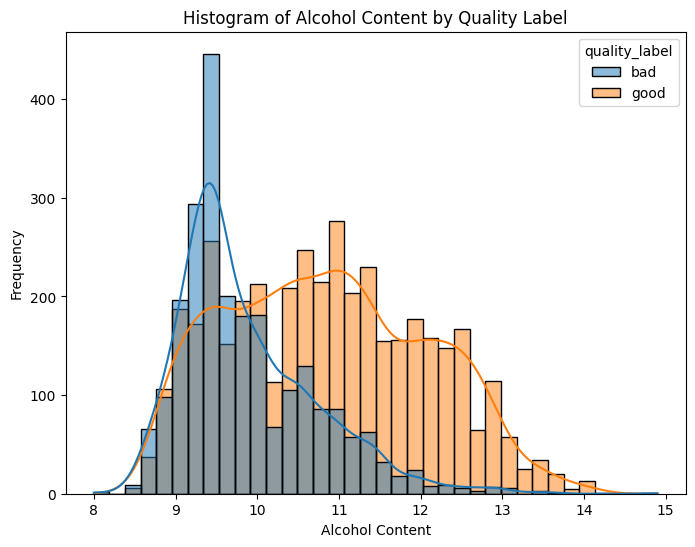

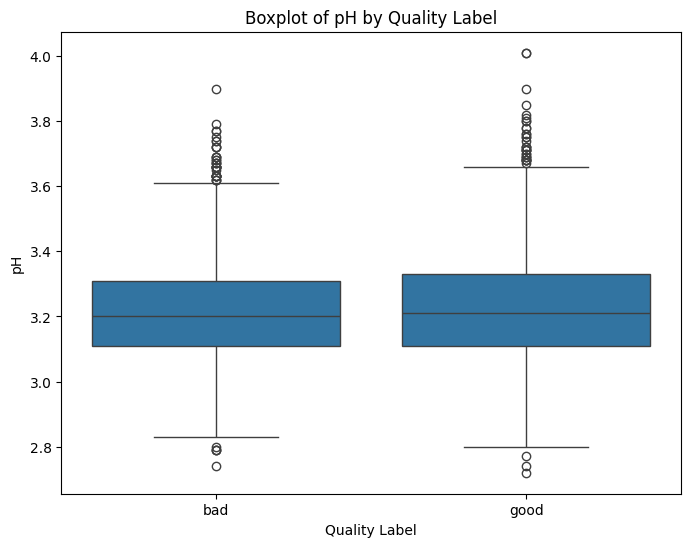

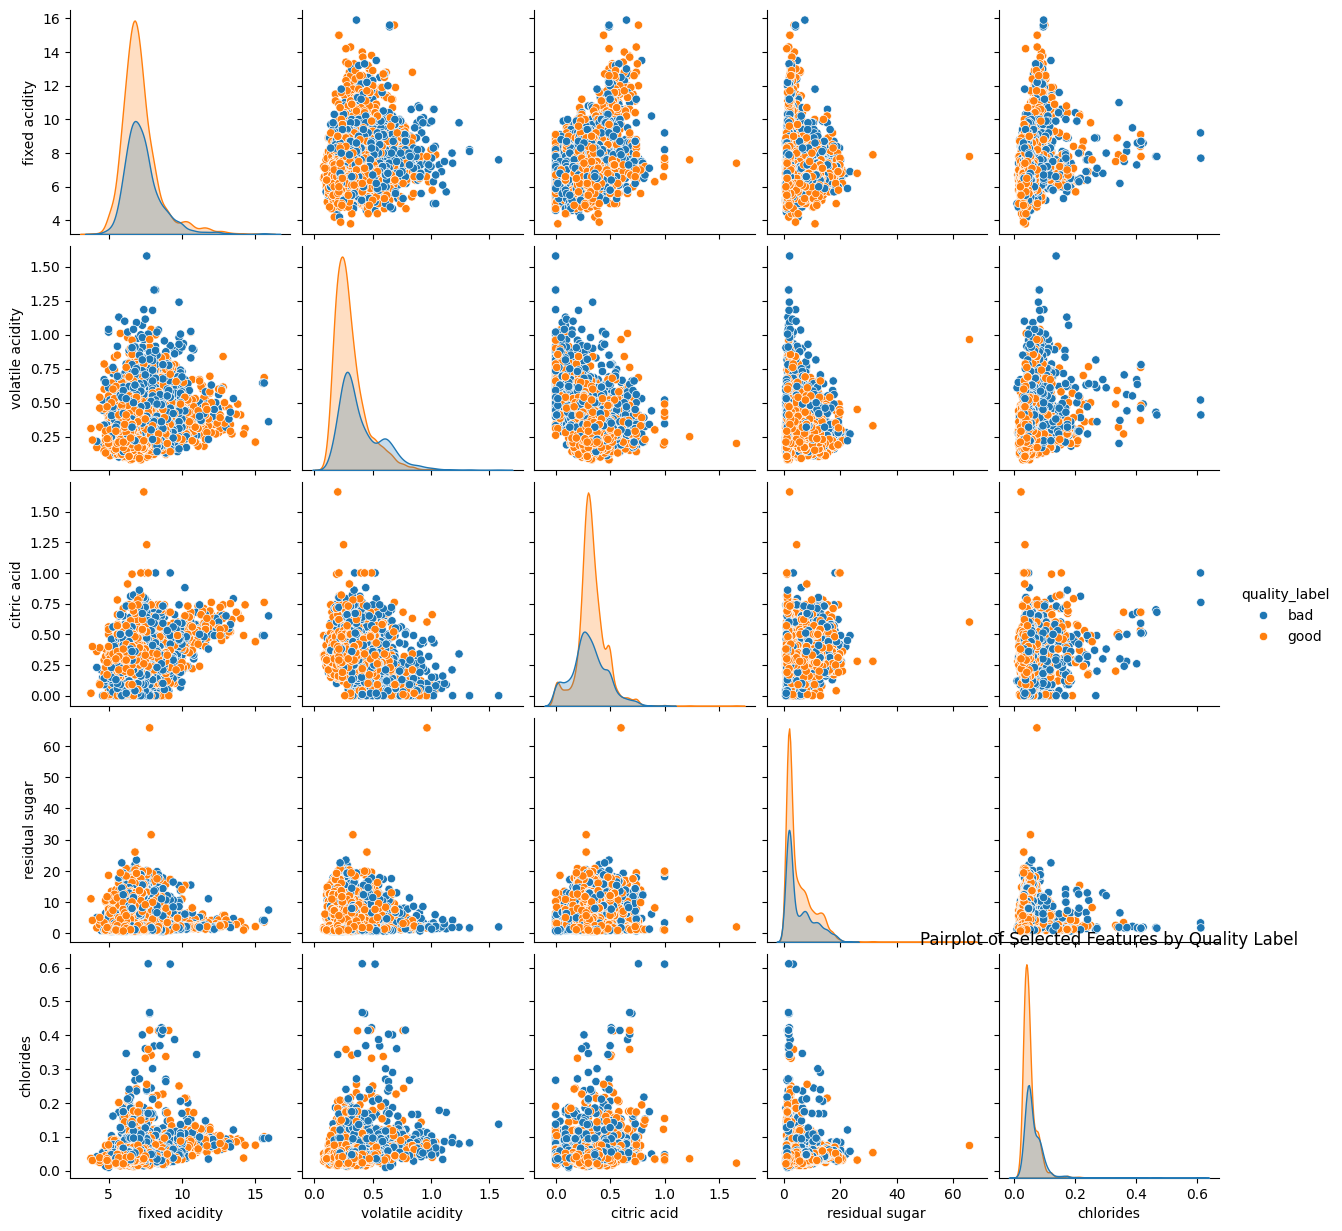

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
red_wine_data = pd.read_csv(url_red, sep=';')
white_wine_data = pd.read_csv(url_white, sep=';')

# Combine red and white wine datasets
wine_data = pd.concat([red_wine_data, white_wine_data])

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(wine_data.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(wine_data.isnull().sum())

# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(wine_data.describe())

# Data processing
# Convert quality rating to binary (good or bad) based on threshold
threshold = 6
wine_data['quality_label'] = wine_data['quality'].apply(lambda x: 'good' if x >= threshold else 'bad')

# Data visualization
# Figure 1: Histogram of alcohol content by quality label
plt.figure(figsize=(8, 6))
sns.histplot(data=wine_data, x='alcohol', hue='quality_label', kde=True)
plt.title("Histogram of Alcohol Content by Quality Label")
plt.xlabel("Alcohol Content")
plt.ylabel("Frequency")
plt.show()

# Figure 2: Boxplot of pH by quality label
plt.figure(figsize=(8, 6))
sns.boxplot(data=wine_data, x='quality_label', y='pH')
plt.title("Boxplot of pH by Quality Label")
plt.xlabel("Quality Label")
plt.ylabel("pH")
plt.show()

# Figure 3: Pairplot of selected features colored by quality label
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'quality_label']
sns.pairplot(wine_data[selected_features], hue='quality_label')
plt.title("Pairplot of Selected Features by Quality Label")
plt.show()
